python3 -m venv .venv
source .venv/bin/activate
which python
.venv/bin/python

https://packaging.python.org/en/latest/guides/installing-using-pip-and-virtual-environments/

python3 -m pip install -r requirements.txt

In [4]:
import cv2

from time import sleep
from PIL import Image, ImageDraw, ImageFont

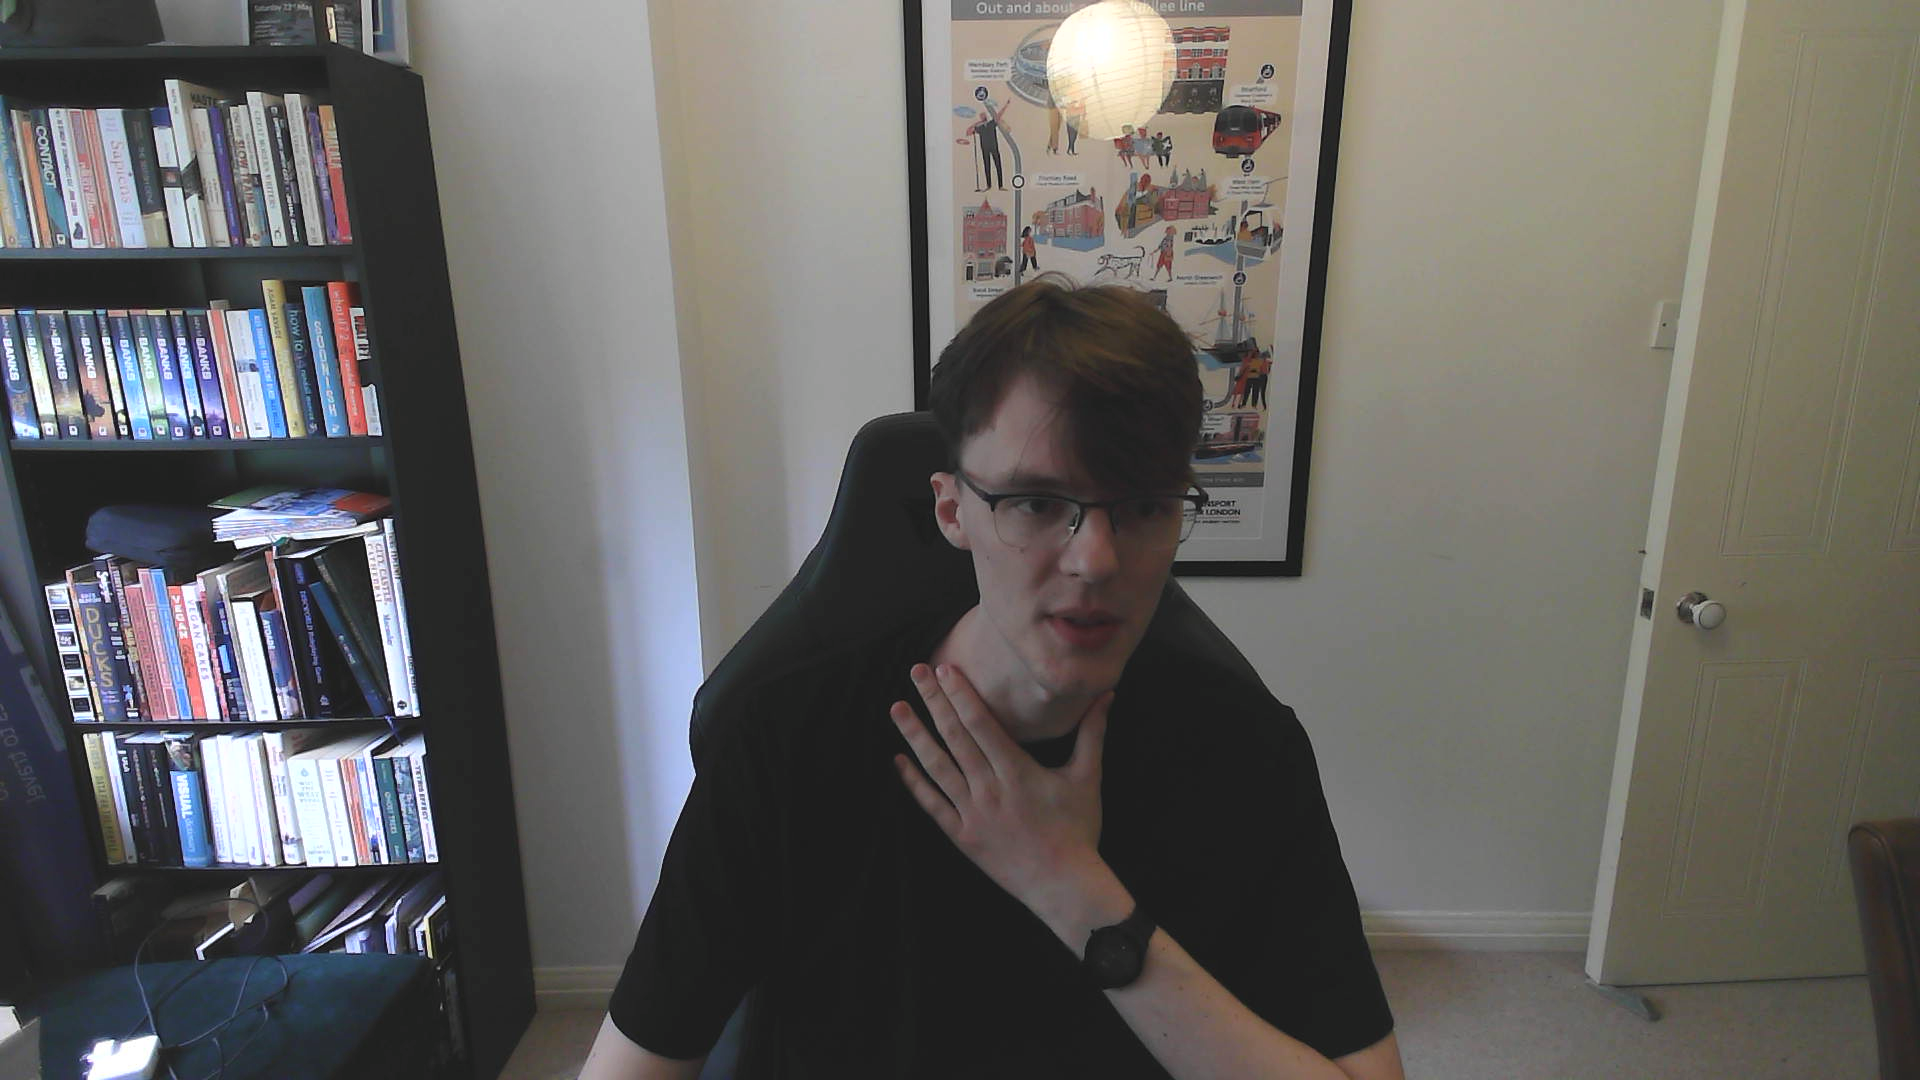

In [5]:
cap = cv2.VideoCapture(0)   # /dev/video0
sleep(2)
ret, frame = cap.read()
cap.release()

photo = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

display(photo)

In [6]:
characters = 'Ñ@#W$9876543210?!abc;:+=-,._ ' # Taken from https://play.ertdfgcvb.xyz/

def greyscale_to_index(num):
  return int(num  / 255 * (len(characters)-1))

def image_to_ascii(img):
    greyImage = img.convert('L')
    resizedImage = greyImage.resize((80,70), resample=Image.Resampling.BILINEAR)
    pixels = resizedImage.load()
    ascii = ''
    for y in range(0,resizedImage.height):
        for x in range(0,resizedImage.width):
            pixel = pixels[x,y]
            i = greyscale_to_index(pixel)
            ascii+=str(characters[i])
        ascii+='\n'
    return ascii

resized_image = photo.resize((128,64),Image.Resampling.NEAREST)
ascii_picture = image_to_ascii(resized_image)

print(ascii_picture)

698899521124454011!bbccccccaaaabbcccc2a?1?0?c..=a22233!11abbbaaaaaa!!!!!!?000011
888999732226675012!bbbbccccaaaabbbccc2?baaba=__.+bb!!!a11abbaaaaaaa!!!!!!??00011
8889$9733335685022?abbbccccaaaaabbccc21bbbbb. __:!caaab11abbaaaaaaa!!!!!!?000111
99$$$$9888899$8532?!abbbcccaaaaabbccc25bbb!b___.:22!aab01abaaaaaaaa!!!!a!?000111
$$$WWW$$$$$$W$98740!aabbbccaaaaabbccc37bba0b.__,;23?!!a61aaaaaaaaa!!!!!a!?001111
WWWWWW958959W$99950?!aabbbcbaaaabbbcc37bba?a-..-b34!aa!91aaaaaaaaa!!!!!a!0001112
$847486?24?56699950?!!aabbcbaaaabbbbc37aaa!a;-,=?562!a!80aaaaaaaaa!!!!!a?0001112
73c0c54!!0a?1499971?!!aabbba!!aabbbbb47a?!aaa:=:03574?!5?aaaaaaa!!!!!!!a?0011112
21baa52!!2a!2589$$30?!!aabba!!aaabbbb36b22!!1bc??!2870?5!aaaaaa!!!!!!!?a?0011112
151aa1a:!3?513599920?!!aabba!!!aabbbb15a25?!2a020!152!?5!aaaaa!!!!!!!!?a?0001111
?22?c!6;?5!42079$9300?!aabba!!!aabbbb!4ba3aaaaa10!!?0??4!aaaaa!!!!!!!?!a00001112
0?;a;a6304a2207$$9310?!!aaba!!!!aabbb?5a!?a?1!!302?!!??5!aaa!!!!!!!!!!!a00011112
10bb1?40634??17$$9310?!!aaba

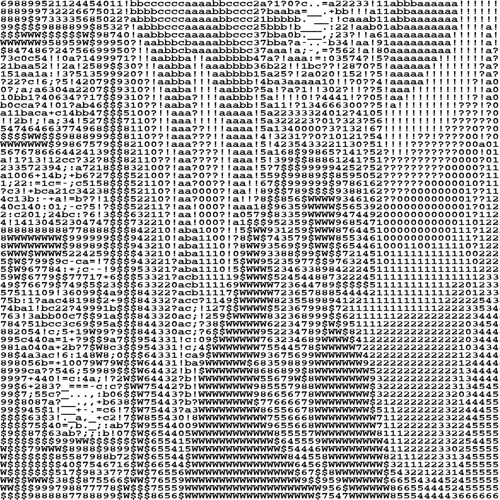

In [12]:
img = Image.new('L', (8*128,20*64), 255) #TODO dynamically calculate text size
draw = ImageDraw.Draw(img)
font = ImageFont.truetype("../../fonts/courier.ttf", 24)
draw.text((0, 0),ascii_picture,0,font=font)
display(img.resize((500,500)))